# MATLAB-like API vs OOP API

jrjohansson [github](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

# MATLAB-like API

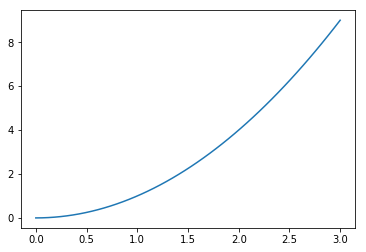

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3)
y1 = x ** 2
y2 = np.sqrt(x)

#plt.figure()

if 1:
    plt.plot(x,y1)
elif 0:
    plt.subplot(2,3,1)
    plt.plot(x,y1)
    plt.subplot(2,3,2)
    plt.plot(y1,x)
    plt.subplot(2,3,3)
    plt.plot(x,y1)
    plt.subplot(2,3,4)
    plt.plot(x,y2)
    plt.subplot(2,3,5)
    plt.plot(y2,x)
    plt.subplot(2,3,6)
    plt.plot(x,y2)
elif 1:
    # from jrjohansson:
    # That was easy, 
    # but it isn't so pretty with overlapping figure axes and labels, 
    # right?
    # We can deal with that by using the plt.tight_layout method, 
    # which automatically adjusts the positions of the axes 
    # on the figure canvas 
    # so that there is no overlapping content:
    plt.subplot(2,3,1)
    plt.plot(x,y1)
    plt.subplot(2,3,2)
    plt.plot(y1,x)
    plt.subplot(2,3,3)
    plt.plot(x,y1)
    plt.subplot(2,3,4)
    plt.plot(x,y2)
    plt.subplot(2,3,5)
    plt.plot(y2,x)
    plt.subplot(2,3,6)
    plt.plot(x,y2)
    plt.tight_layout() # this line is added

plt.show()

# OOP API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot.

To use the object-oriented API, instead of creating a new global figure instance we store a reference to the newly created figure instance in the  fig variable, and from it we create a new axis instance axes using the add_axes method in the Figure class instance fig:

jrjohansson [github](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

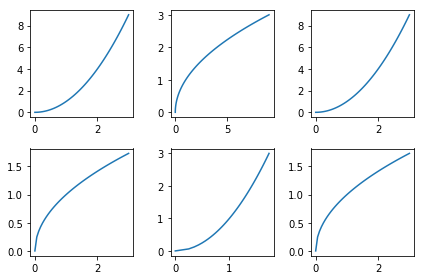

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3)
y1 = x ** 2
y2 = np.sqrt(x)

if 0:
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
    ax.plot(x, y1)
elif 0:
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
    ax1.plot(x, y1) # main figure
    ax2.plot(y1, x) # insert
elif 0:
    # from jrjohansson:
    # If we don't care about being explicit about 
    # where our plot axes are placed in the figure canvas, 
    # then we can use one of the many axis layout managers in matplotlib. 
    # My favorite is subplots, which can be used like this:
    fig, ax = plt.subplots()
    ax.plot(x, y1)
elif 0:
    # error
    # https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot
    # If you debug your program by simply printing ax, 
    # you'll quickly find out that ax is a two-dimensional array: 
    # one dimension for the rows, one for the columns.
    fig, axes = plt.subplots(nrows=2, ncols=3)
    for ax in axes:
        ax.plot(x, y1)
    #print(axes)
elif 0:
    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0,0].plot(x,y1)
    axes[0,1].plot(y1,x)
    axes[0,2].plot(x,y1)
    axes[1,0].plot(x,y2)
    axes[1,1].plot(y2,x)
    axes[1,2].plot(x,y2)
elif 0:
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
    ax1.plot(x,y1)
    ax2.plot(y1,x)
    ax3.plot(x,y1)
    ax4.plot(x,y2)
    ax5.plot(y2,x)
    ax6.plot(x,y2)
elif 0:
    # from jrjohansson:
    # That was easy, 
    # but it isn't so pretty with overlapping figure axes and labels, 
    # right?
    # We can deal with that by using the fig.tight_layout method, 
    # which automatically adjusts the positions of the axes 
    # on the figure canvas 
    # so that there is no overlapping content:
    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0,0].plot(x,y1)
    axes[0,1].plot(y1,x)
    axes[0,2].plot(x,y1)
    axes[1,0].plot(x,y2)
    axes[1,1].plot(y2,x)
    axes[1,2].plot(x,y2)
    fig.tight_layout() # this line is added
elif 1:
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
    ax1.plot(x,y1)
    ax2.plot(y1,x)
    ax3.plot(x,y1)
    ax4.plot(x,y2)
    ax5.plot(y2,x)
    ax6.plot(x,y2)      
    fig.tight_layout() # this line is added

plt.show()

# MATLAB-like API vs OOP API

##### Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

jakevdp [github](https://github.com/jakevdp/PythonDataScienceHandbook)

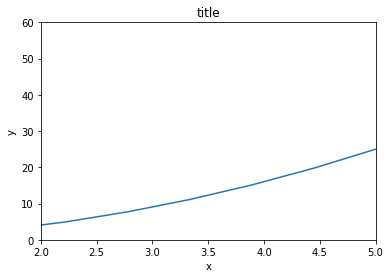

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 10)
y = x ** 2

if 0:
    plt.figure()
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([2, 5])
    plt.ylim([0, 60])
    plt.title('title')    
elif 1:
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim([2, 5])
    ax.set_ylim([0, 60])
    ax.set_title('title')
    
plt.show()